# <center> Visualizations

**Welcome to the third notebook in this series!**

In this notebook, we will go through the basics of data visualization. We will be using Matplotlib and Seaborn, two commonly used visualization rendering packages, to create visualizations for our data. Visualizations are very powerful tools because they build representations of large data sets and help us identify trends or patterns in the data that may not have been obvious before. 

Before we can use these packages, they must be imported. **Run the cell below to import them!**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#We import these packages as sns and plt, respectively, and will use these shortened names when we make 
#function calls!

<br>
--
## Matplotlib 


Matplotlib is a library that is commonly used to create different types of visualizations in python: graphs, charts, and more. Matplotlib uses specific syntax to create plots. 


### Main Functions
Navigate to this link for more detailed descriptions on different kinds of plots you can make!
https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

Here are the most common plots made using matplotlib and the specific syntax used to create them!


1. Line Plot
    > Line plots are often used to study chronological trends and patterns.
    >>plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

2. Histogram
>Histograms visualize numerical distributions.
>> plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

3. Bar Chart
> Bar charts are used to display categorical distributions which a bar for each category.
> > plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

**Let's try it! Run the cells below to create different types of plots with matplotlib.**

#### Line Plot Example

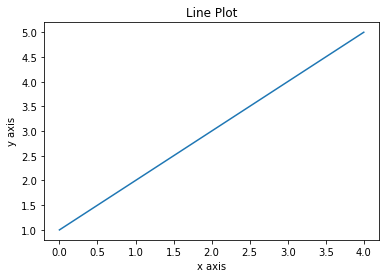

In [ ]:
plt.plot([1, 2, 3, 4, 5])
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.title("Line Plot");

When using Matplotlib, we can not plot the data and also customize our axes, titles, and even change the size and colors of our graphs.

#### Histogram Example

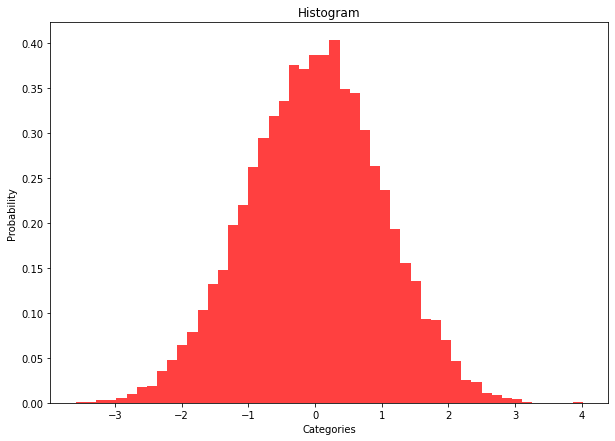

In [ ]:
x = np.random.randn(10000)
plt.figure(figsize=(10, 7))
n, bins, patches = plt.hist(x, 50, density=1, facecolor='r', alpha=0.75)
plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Histogram');

#### Bar Chart Example

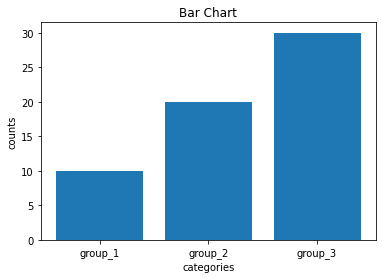

In [ ]:
names = ['group_1', 'group_2', 'group_3']
counts = [10, 20, 30]
plt.bar(names, counts)
plt.xlabel('categories')
plt.ylabel('counts')
plt.title("Bar Chart");

<br>

### Spectrograms in Matplotlib

Matplotlib can also be used to create all different kinds of plots - we have covered the basics. 

Next, we will be looking into how to create spectrograms of data. Spectrograms are visualizations used to analyze a signal's  strength over time at various frequencies present in a waveform.

[Read here] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html) to understand each parameter of this function call

In the code cell below is an example of how to create a spectrogram with matplotlib.

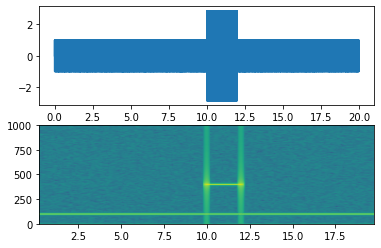

In [ ]:
# Example taken from https://matplotlib.org/stable/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

<br>
--
## Seaborn 

Seaborn is closely related to Matplotlib and is an extensive data visualization library used to create colorful and interactive plots. In comparison to Matplotlib, it provides more detailed and high-level visualizations. 

If you would like to read more about Seaborn feel free to navigate to the resource linked [here] (https://seaborn.pydata.org/introduction.html)!

### Let's try it out!
Seaborn, like Matplotlib, can be used to analyze relationships in data. We can similarly make line plots, histograms, and bar charts like the ones above! However, this library has a different interface so the plots look slightly different. Common plots in seaborn are scatterplots, line plots, violin graphs, and more.


### Scatterplots
Here is the documentation used to create a scatter plot.

>seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)

The relationship between x and y can be shown for different subsets by creating a scatterplot.

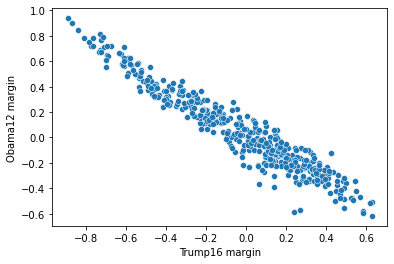

In [ ]:
df = pd.read_csv("Introduction_Demos/election_data.csv")
sns.scatterplot(
    data=df,
    x="Trump16 margin", y="Obama12 margin"
);

#### Jointplot
Here is the documentation used to create a joint plot.

>seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)

This unique plot, jointplot, creates a plot of the joint distribution between two variables along with each variable’s marginal distribution:

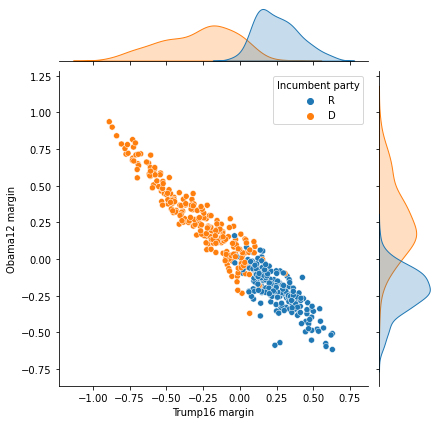

In [ ]:
df = pd.read_csv("Introduction_Demos/election_data.csv")
sns.jointplot(data=df, x="Trump16 margin", y="Obama12 margin", hue="Incumbent party");

<br>
--
## Preliminary Plots

Now that we have gone over the basics of data visualizations, we will create plots of the ampanile data set to see if there is anything interesting going on. The next few code cells will import the cleaned and normalized data from the previous notebook, so be sure to **run the code cells below!**

In [ ]:
# SOUTH WEST DATA

#import data & package
import pandas as pd
sw_df_original = pd.read_csv('sather-tower-files/SouthWest.csv')

#take subset of data
sw_last_bell = sw_df_original.set_index('Sample No.')
sw_last_bell = sw_last_bell[(sw_last_bell['time[sec]'] >= 400) & (sw_last_bell['time[sec]'] < 407)]

#normalize data
sw_last_bell['Ax[mG]'] = sw_last_bell['Ax[mG]']-sw_last_bell['Ax[mG]'].iloc[0]
sw_last_bell['Ay[mG]'] = sw_last_bell['Ay[mG]']-sw_last_bell['Ay[mG]'].iloc[0]
sw_last_bell['Az[mG]'] = sw_last_bell['Az[mG]']-sw_last_bell['Az[mG]'].iloc[0]

#resetting axis 
sw_last_bell["Global X"] = sw_last_bell["Ay[mG]"]
sw_last_bell["Global Y"] = sw_last_bell["Az[mG]"]
sw_last_bell["Global Z"] = sw_last_bell["Ax[mG]"]
sw_last_bell_clean = sw_last_bell[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

In [ ]:
# NORTH WEST DATA

#import data
nw_df_original = pd.read_csv('sather-tower-files/NorthWest.csv')

#take subset of data
nw_last_bell = nw_df_original.set_index('Sample No.')
nw_last_bell = nw_last_bell[(nw_last_bell['time[sec]'] >= 400) & (nw_last_bell['time[sec]'] < 407)]

#normalize data
nw_last_bell['Ax[mG]'] = nw_last_bell['Ax[mG]']-nw_last_bell['Ax[mG]'].iloc[0]
nw_last_bell['Ay[mG]'] = nw_last_bell['Ay[mG]']-nw_last_bell['Ay[mG]'].iloc[0]
nw_last_bell['Az[mG]'] = nw_last_bell['Az[mG]']-nw_last_bell['Az[mG]'].iloc[0]

#resetting axis 
nw_last_bell["Global X"] = nw_last_bell["Az[mG]"]
nw_last_bell["Global Y"] =  -1 * nw_last_bell["Ay[mG]"]
nw_last_bell["Global Z"] = nw_last_bell["Ax[mG]"]
nw_last_bell_clean = nw_last_bell[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

In [ ]:
# SOUTH EAST DATA

#import data
se_df_original = pd.read_csv('sather-tower-files/SouthEast.csv')

#take subset of data
se_last_bell = se_df_original.set_index('Sample No.')
se_last_bell = se_last_bell[(se_last_bell['time[sec]'] >= 400) & (se_last_bell['time[sec]'] < 407)]

#normalize data
se_last_bell['Ax[mG]'] = se_last_bell['Ax[mG]']-se_last_bell['Ax[mG]'].iloc[0]
se_last_bell['Ay[mG]'] = se_last_bell['Ay[mG]']-se_last_bell['Ay[mG]'].iloc[0]
se_last_bell['Az[mG]'] = se_last_bell['Az[mG]']-se_last_bell['Az[mG]'].iloc[0]

#resetting axis 
se_last_bell["Global X"] = se_last_bell["Az[mG]"]
se_last_bell["Global Y"] =  -1 * se_last_bell["Ay[mG]"]
se_last_bell["Global Z"] = se_last_bell["Ax[mG]"]
se_last_bell_clean = se_last_bell[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

In [ ]:
# NORTH EAST DATA

#import data
ne_df_original = pd.read_csv('sather-tower-files/NorthEast.csv')

#take subset of data
ne_last_bell = ne_df_original.set_index('Sample No.')
ne_last_bell = ne_last_bell[(ne_last_bell['time[sec]'] >= 400) & (ne_last_bell['time[sec]'] < 407)]

#normalize data
ne_last_bell['Ax[mG]'] = ne_last_bell['Ax[mG]']-ne_last_bell['Ax[mG]'].iloc[0]
ne_last_bell['Ay[mG]'] = ne_last_bell['Ay[mG]']-ne_last_bell['Ay[mG]'].iloc[0]
ne_last_bell['Az[mG]'] = ne_last_bell['Az[mG]']-ne_last_bell['Az[mG]'].iloc[0]

#resetting axis 
ne_last_bell["Global X"] = ne_last_bell["Az[mG]"]
ne_last_bell["Global Y"] =  -1 * ne_last_bell["Ay[mG]"]
ne_last_bell["Global Z"] = ne_last_bell["Ax[mG]"]
ne_last_bell_clean = ne_last_bell[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

### Acceleration vs. Time

As you may remember from the Data Preparation Notebook, for the rest of the notebooks we will focus on a very specific subset of the data. In particular, we focus on the 7 seconds or data collection, starting at 400 sec and ending on 407. 

However, what's stopping us from first looking at the **_entire dataset_?**  

Below is the normalization of the entire dataset, rather than just 7 seconds worth of data. It follows the exact same structure as the previous normalization we went over!

In [ ]:
#normalization of entire data
sw_original = sw_df_original.set_index('Sample No.')
sw_original['Ax[mG]'] = sw_original['Ax[mG]']-sw_original['Ax[mG]'].iloc[0]
sw_original['Ay[mG]'] = sw_original['Ay[mG]']-sw_original['Ay[mG]'].iloc[0]
sw_original['Az[mG]'] = sw_original['Az[mG]']-sw_original['Az[mG]'].iloc[0]
sw_original["Global X"] = sw_original["Ay[mG]"]
sw_original["Global Y"] = sw_original["Az[mG]"]
sw_original["Global Z"] = sw_original["Ax[mG]"]
sw_original_clean = sw_original[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

se_original = se_df_original.set_index('Sample No.')
se_original['Ax[mG]'] = se_original['Ax[mG]']-se_original['Ax[mG]'].iloc[0]
se_original['Ay[mG]'] = se_original['Ay[mG]']-se_original['Ay[mG]'].iloc[0]
se_original['Az[mG]'] = se_original['Az[mG]']-se_original['Az[mG]'].iloc[0]
se_original["Global X"] = se_original["Ay[mG]"]
se_original["Global Y"] = se_original["Az[mG]"]
se_original["Global Z"] = se_original["Ax[mG]"]
se_original_clean = se_original[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

nw_original = nw_df_original.set_index('Sample No.')
nw_original['Ax[mG]'] = nw_original['Ax[mG]']-nw_original['Ax[mG]'].iloc[0]
nw_original['Ay[mG]'] = nw_original['Ay[mG]']-nw_original['Ay[mG]'].iloc[0]
nw_original['Az[mG]'] = nw_original['Az[mG]']-nw_original['Az[mG]'].iloc[0]
nw_original["Global X"] = nw_original["Ay[mG]"]
nw_original["Global Y"] = nw_original["Az[mG]"]
nw_original["Global Z"] = nw_original["Ax[mG]"]
nw_original_clean = nw_original[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

ne_original = ne_df_original.set_index('Sample No.')
ne_original['Ax[mG]'] = ne_original['Ax[mG]']-ne_original['Ax[mG]'].iloc[0]
ne_original['Ay[mG]'] = ne_original['Ay[mG]']-ne_original['Ay[mG]'].iloc[0]
ne_original['Az[mG]'] = ne_original['Az[mG]']-ne_original['Az[mG]'].iloc[0]
ne_original["Global X"] = ne_original["Ay[mG]"]
ne_original["Global Y"] = ne_original["Az[mG]"]
ne_original["Global Z"] = ne_original["Ax[mG]"]
ne_original_clean = ne_original[['time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]

Let's start by looking at the Global Acceleration in the X direction of all 4 accelerometers. We are using matplotlib to plot the time on the x-axis, and the Global X Acceleration in the y-axis. A red line is also drawn on x = 0. A graph with datapoints solely on the x-axis (the red line) would indicate no change in acceleration from the first measurement. 

Text(0.5, 1.0, 'SouthEast ')

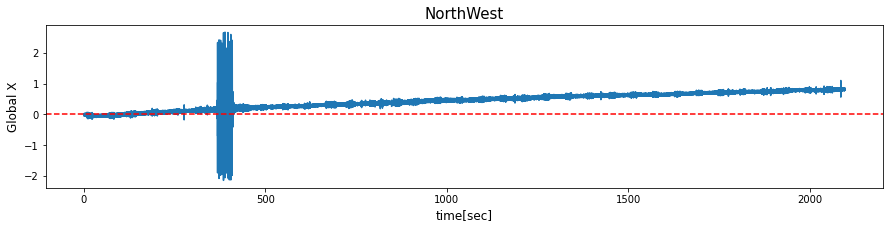

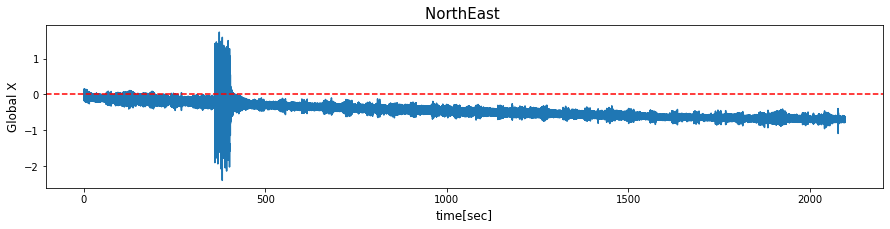

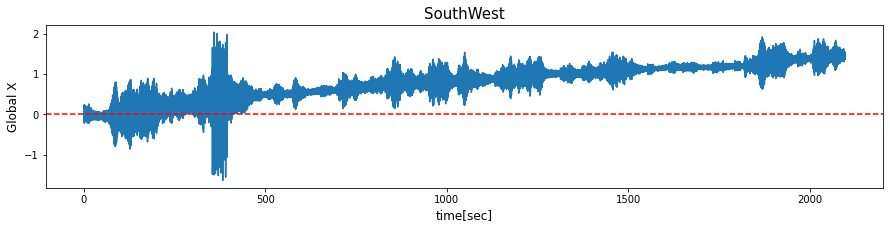

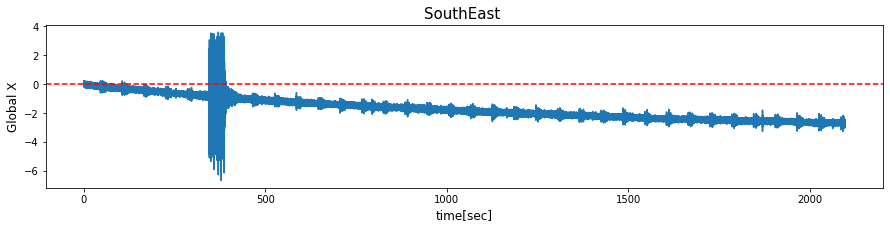

In [ ]:
f = plt.figure(figsize=(15, 3))
plt.plot(nw_original_clean["time[sec]"], nw_original_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize=12)
plt.xlabel("time[sec]", fontsize=12)
plt.title("NorthWest", fontsize =15)

f = plt.figure(figsize=(15, 3))
plt.plot(ne_original_clean["time[sec]"], ne_original_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize=12)
plt.xlabel("time[sec]", fontsize=12)
plt.title("NorthEast ", fontsize =15)

f = plt.figure(figsize=(15, 3))
plt.plot(sw_original_clean["time[sec]"], sw_original_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize=12)
plt.xlabel("time[sec]", fontsize=12)
plt.title("SouthWest", fontsize =15)

f = plt.figure(figsize=(15, 3))
plt.plot(se_original_clean["time[sec]"], se_original_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize=12)
plt.xlabel("time[sec]", fontsize=12)
plt.title("SouthEast ", fontsize =15)

**Analysis**


There are so many interesting things happening in the graphs above, which describes movement in the X direction. 
- As you can see, the biggest spike in acceleration occurs at the moment of the last bell ring. From there, the 2 accelerometers on the South end of the Campanile exhibit the biggest oscillations and continued changes in acceleration.  
- One thing you might notice is the general increase in acceleration as time goes on in every accelerometer except the one in the SouthEast direction. For now, it is enough to identify and understand this trends.  
-  If you look closely, accelerometers on the West follow a certain pattern, while acceleromaters on the East follow a different pattern. 
- If I asked you to pick the most volatile accelerometer, which would you pick? Most likely, you picked the SouthWest Accelerometer, and you would be right! Since both accelerometers on the South side of the Campanile had the biggest oscillations and changes in acceleration, let's take a closer look at both under our normal 7 second time period.  

Below we have the a line plot of the acceration of each variable on the South West Accerlerometer over time. 

Text(0.5, 0, 'time[sec]')

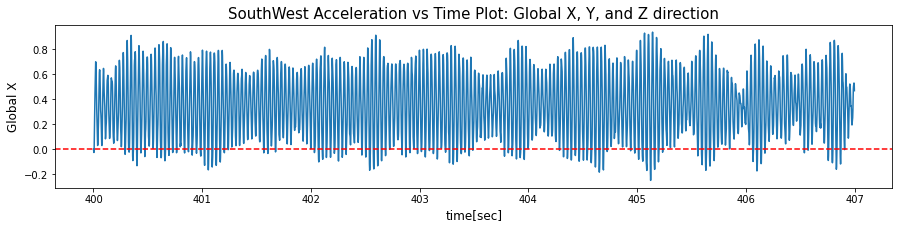

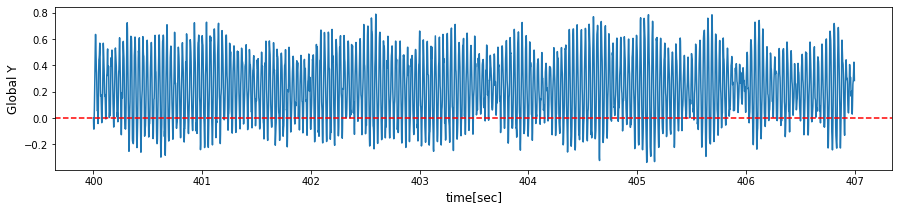

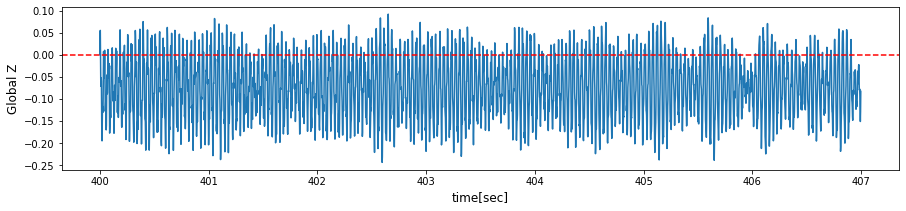

In [ ]:
f = plt.figure(figsize = (15, 3))
plt.plot(sw_last_bell_clean["time[sec]"], sw_last_bell_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)
plt.title("SouthWest Acceleration vs Time Plot: Global X, Y, and Z direction", fontsize =15)

f = plt.figure(figsize = (15, 3))
plt.plot(sw_last_bell_clean["time[sec]"], sw_last_bell_clean["Global Y"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Y", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

f = plt.figure(figsize = (15, 3))
plt.plot(sw_last_bell_clean["time[sec]"], sw_last_bell_clean["Global Z"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Z", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

Here we have the a line plot of the acceration of each variable on the South East Accerlerometer over time.

Text(0.5, 0, 'time[sec]')

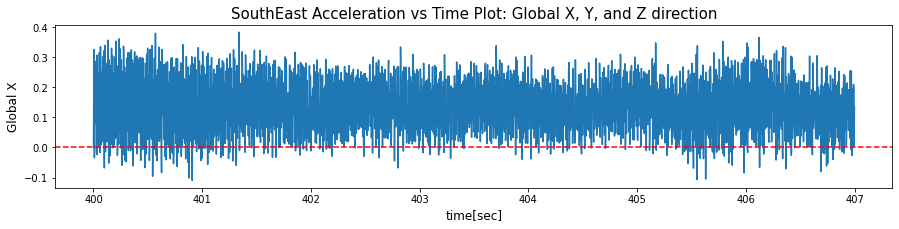

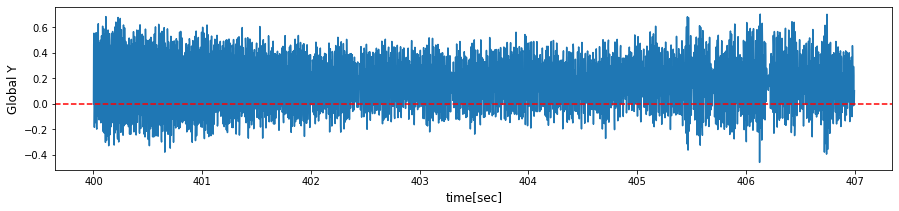

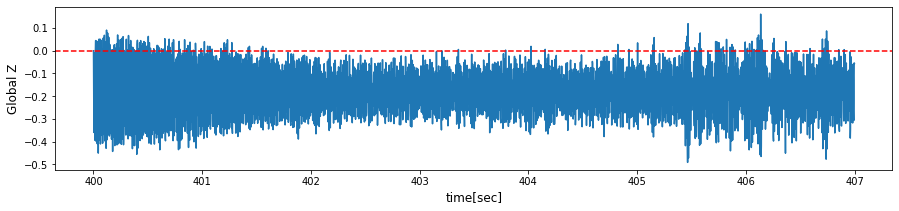

In [ ]:
f = plt.figure(figsize = (15, 3))
plt.plot(se_last_bell_clean["time[sec]"], se_last_bell_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)
plt.title("SouthEast Acceleration vs Time Plot: Global X, Y, and Z direction", fontsize =15)

f = plt.figure(figsize = (15, 3))
plt.plot(se_last_bell_clean["time[sec]"], se_last_bell_clean["Global Y"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Y", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

f = plt.figure(figsize = (15, 3))
plt.plot(se_last_bell_clean["time[sec]"], se_last_bell_clean["Global Z"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Z", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

**Analysis**

- Interestingly, both accelerometers on the South of the Campanile behave nearly identically. The Global X and Y Accelerations both increase, while the Z direction generally decreases from the first measurment onwards. 
- For the entire duration of the bell ring, there is great oscillation in the graph, and therefore a rapid and constant change in acceleration. 

Based on the Southern accelerometers having similar results, a good prediction would be to say that both North accelerometers should behave nearly identically to eachother. Let's find out, by using the same terchniques to plot the results below!

Below are line plots of the acceration of each variable on the North West Accerlerometer over time.

Text(0.5, 0, 'time[sec]')

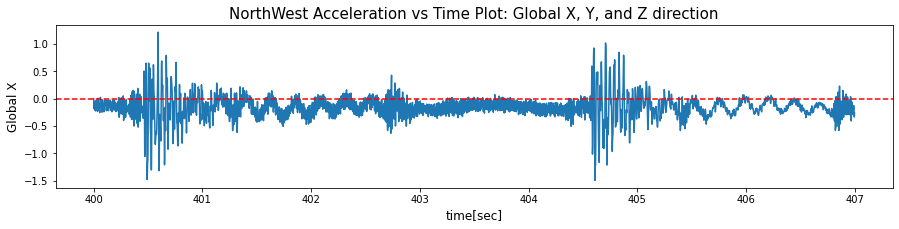

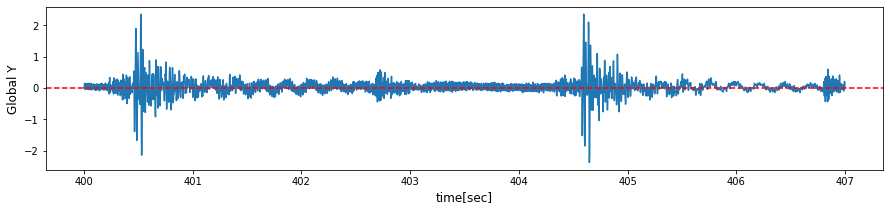

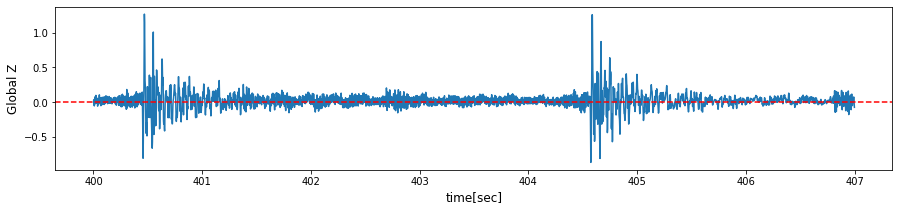

In [ ]:
f = plt.figure(figsize = (15, 3))
plt.plot(nw_last_bell_clean["time[sec]"], nw_last_bell_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)
plt.title("NorthWest Acceleration vs Time Plot: Global X, Y, and Z direction", fontsize =15)

f = plt.figure(figsize = (15, 3))
plt.plot(nw_last_bell_clean["time[sec]"], nw_last_bell_clean["Global Y"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Y", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

f = plt.figure(figsize = (15, 3))
plt.plot(nw_last_bell_clean["time[sec]"], nw_last_bell_clean["Global Z"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Z", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

Below are line plots of the acceration of each variable on the North East Accerlerometer over time.

Text(0.5, 0, 'time[sec]')

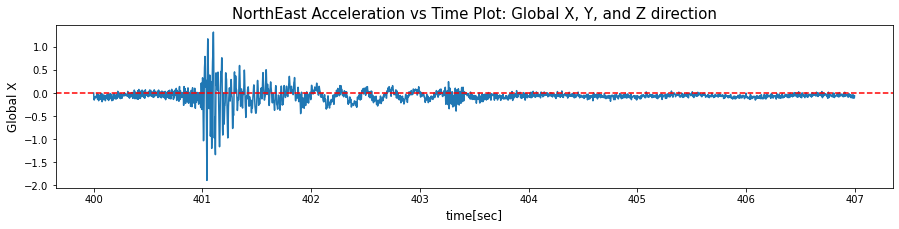

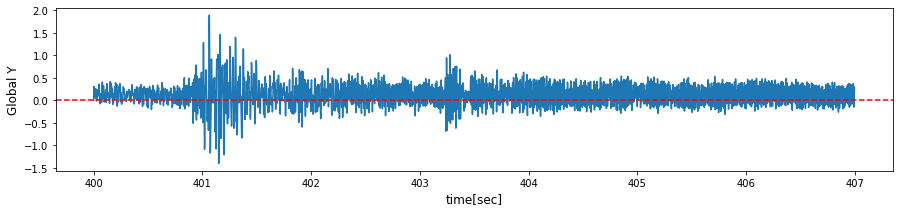

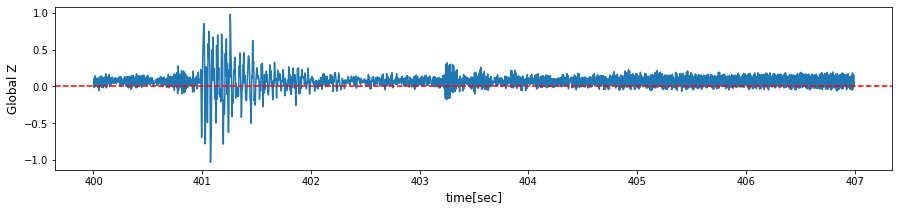

In [ ]:
f = plt.figure(figsize = (15, 3))
plt.plot(ne_last_bell_clean["time[sec]"], ne_last_bell_clean["Global X"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global X", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)
plt.title("NorthEast Acceleration vs Time Plot: Global X, Y, and Z direction", fontsize =15)

f = plt.figure(figsize = (15, 3))
plt.plot(ne_last_bell_clean["time[sec]"], ne_last_bell_clean["Global Y"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Y", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

f = plt.figure(figsize = (15, 3))
plt.plot(ne_last_bell_clean["time[sec]"], ne_last_bell_clean["Global Z"])
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Global Z", fontsize = 12)
plt.xlabel("time[sec]", fontsize = 12)

Our educated guess was not completely wrong! Both the NorthWest and the NorthEast accelerometer have a spike at around 401 seconds. However, the NorthWest accelerometer showed a second spike 4 seconds later that did not occur in the NorthEast acceleromater. 

Based on the preliminary plots we crated above, we can see patterns forming and questions left unanswered. The South accelerometers have nearly identical data on the last bell ring, so why is it that the North Accelerometers have a key difference? Why does some data drift further away from the x-axis, and what determines the drift direction? 

Through simply visualizing the data we are given, we can come up with so many questions and trends that can lead us through the data interpretation process. 

<br>
-
## Axis Comparison

Another interesting think to look at is how two variables on the same axis, but different accelerometers behave. For example, how the x-axis variable of the North West Accelerometer and South West Accelerometer behave in comparison to eachother. Because both accelerometers are places on the west side of the Campanile, we can predict that the up and down movement of the tower, measured by the x-axis, would be relatively similar. Let's see if our prediction is correct!

### X-Axis Comparison

Let us analyze the differences in x-axis acceleration measurements between the NorthWest and SouthWest accelerometers! Looking at this overlaid line plot, we can visualize the differences in acceleration measurements between the NW and SW accelerometers over time. 

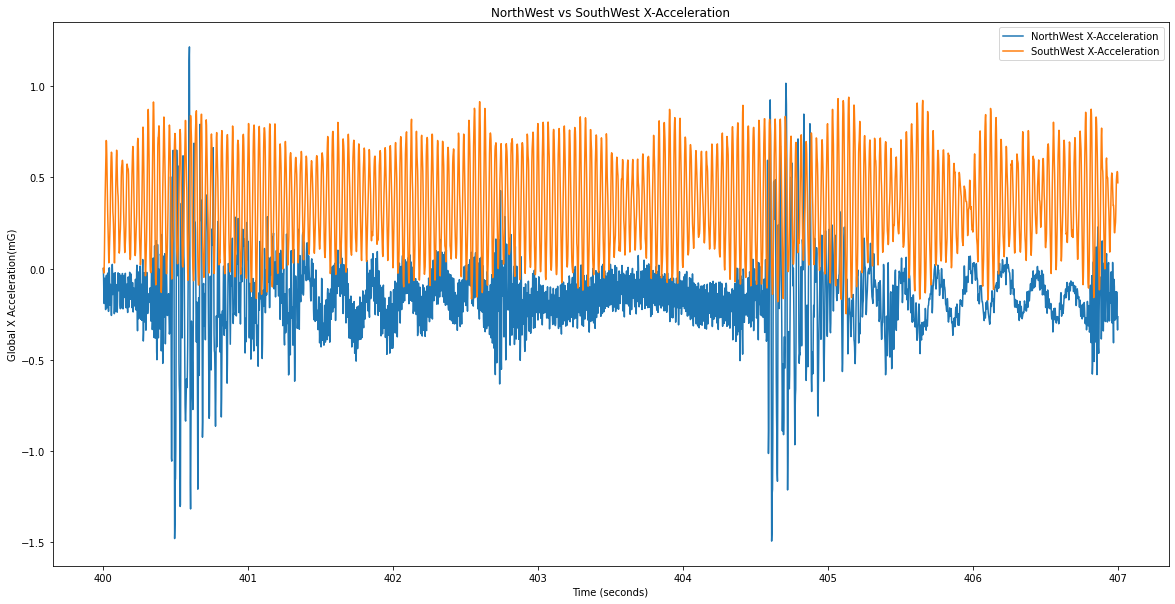

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

x1 = nw_last_bell_clean["time[sec]"]
y1 = nw_last_bell_clean["Global X"]

plt.plot(x1, y1, label = "NorthWest X-Acceleration")

x2 = sw_last_bell_clean["time[sec]"]
y2 = sw_last_bell_clean["Global X"]

plt.plot(x2, y2, label = "SouthWest X-Acceleration")

plt.xlabel("Time (seconds)")
plt.ylabel("Global X Acceleration(mG)")
plt.title("NorthWest vs SouthWest X-Acceleration")
plt.legend()
plt.show();

The plot above shows that South West x-acceleration is consistently higher than the South West x-acceleration. Additionally, the South West x-acceleration has many more spikes in acceration than the North West x-acceleration. 

### Y-Axis Comparison

Next, let us analyze the differences in y-axis acceleration measurements between the NorthWest and SouthWest accelerometers!

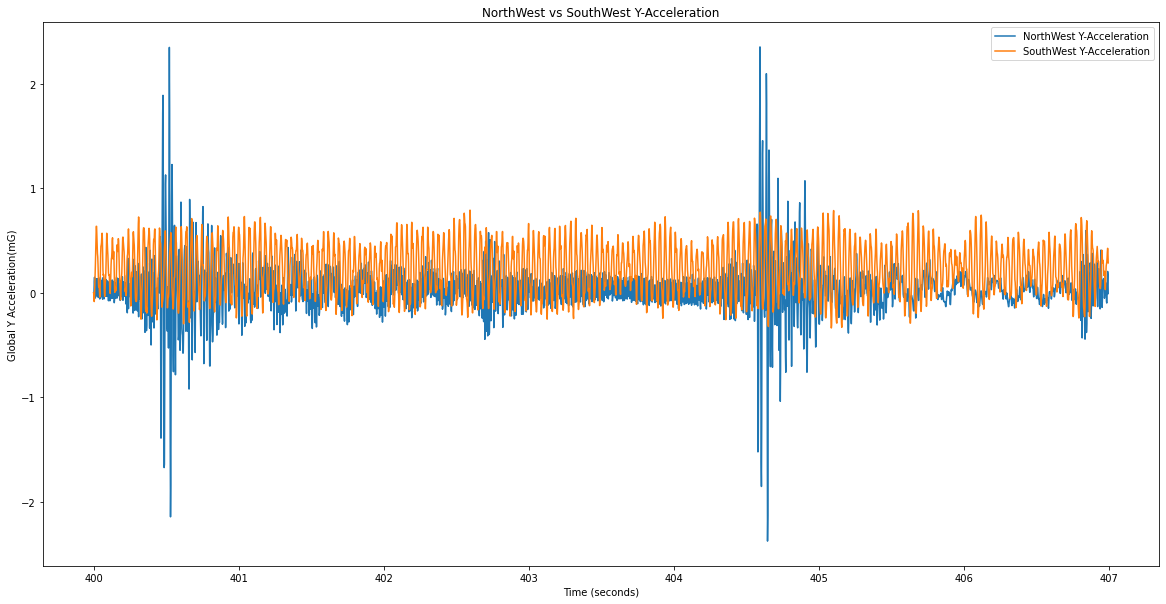

In [ ]:
plt.figure(figsize=(20,10))

x1 = nw_last_bell_clean["time[sec]"]
y1 = nw_last_bell_clean["Global Y"]

plt.plot(x1, y1, label = "NorthWest Y-Acceleration")

x2 = sw_last_bell_clean["time[sec]"]
y2 = sw_last_bell_clean["Global Y"]

plt.plot(x2, y2, label = "SouthWest Y-Acceleration")

plt.xlabel("Time (seconds)")
plt.ylabel("Global Y Acceleration(mG)")
plt.title("NorthWest vs SouthWest Y-Acceleration")
plt.legend()
plt.show();

The plot shows that the y-acceleration and the North West and South West accelerometers are a bit more matched up in comparison to the X-acceleration plot. We can still see that the North West y-acceleration has many more spikes in acceleration than the South West y-acceleration.

### Z-Axis Comparison

Let us analyze the differences in z-axis acceleration measurements between the NorthWest and SouthWest accelerometers!

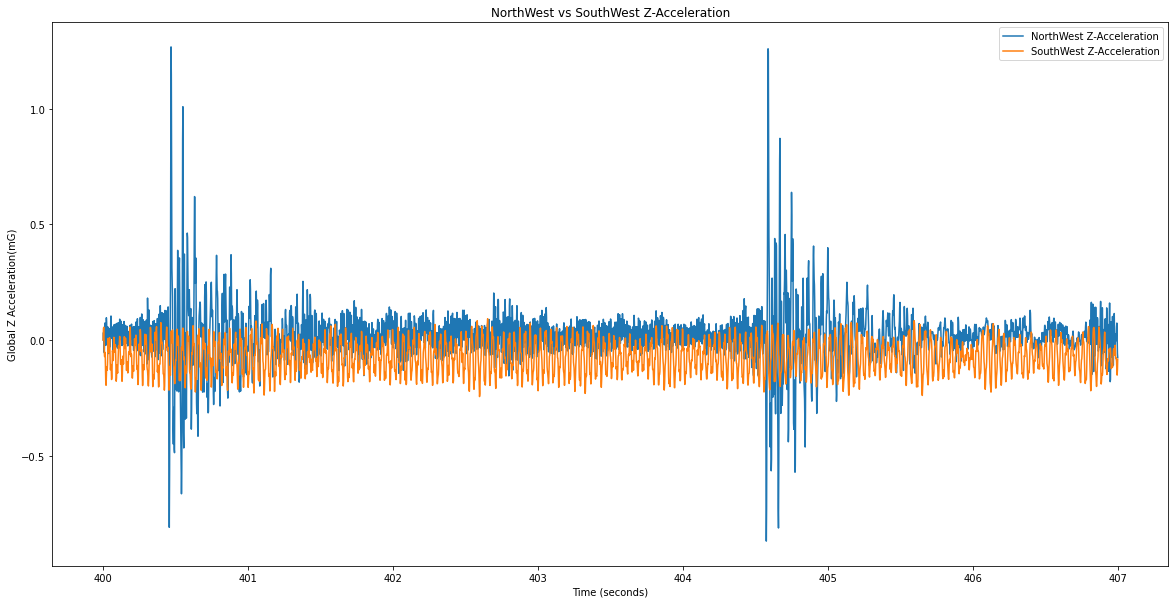

In [ ]:
plt.figure(figsize=(20,10))

x1 = nw_last_bell_clean["time[sec]"]
y1 = nw_last_bell_clean["Global Z"]

plt.plot(x1, y1, label = "NorthWest Z-Acceleration")

x2 = sw_last_bell_clean["time[sec]"]
y2 = sw_last_bell_clean["Global Z"]

plt.plot(x2, y2, label = "SouthWest Z-Acceleration")

plt.xlabel("Time (seconds)")
plt.ylabel("Global Z Acceleration(mG)")
plt.title("NorthWest vs SouthWest Z-Acceleration")
plt.legend()
plt.show();

The plot shows that the South West z-acceleration is consistently equal to or lower than the z-acceleration of North West plot. 


Now that we have compared the acceleration of both the accelerometers on the West side of the Campanile, we see that while they are similar, there are still apparent differences. This could be caused by anything from difference in wind speed, people walking around in the building, the placement of the elevator, etc. 

**Congratulations! You've finished this notebook!** This concludes the third notebook in this series! In this notebook we went over:

- Matplotlib
- Seaborn
- Premliminary Plots

In the next notebook we will introduce the Fast Fourier Transform and how it helps us better interpret the data set!

## Bibliography

Notebooks Developed By: Abdoul Aziz Sandotin, Arda Ulug, Karalyn Chong, Priscilla Zhang, Salvador Ramirez Jr.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ebd495-2227-475e-8d87-73e1af6a492b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>